Every year, American high school students take the SATs - the standardized tests that measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests play a pivotal role in the admissions process.

Analyzing the performance of schools is important for stakeholders such as policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

#### The Data 
I have a dataset called `schools.csv`, which is previewed below. Project idea credits belong to datacamp.com

In [10]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [11]:
# Find the data types of the columns 
print(schools.dtypes)

school_name         object
borough             object
building_code       object
average_math         int64
average_reading      int64
average_writing      int64
percent_tested     float64
dtype: object


In [12]:
# Clean up the data

# Remove duplicate rows
schools.drop_duplicates(inplace=True)

# Remove rows where 'average_math', 'average_reading', or 'average_writing' values are not 
    # between 0 and 800 because those are not valid SAT values
schools = schools[(schools['average_math'] >= 0) & (schools['average_math'] <= 800)]
schools = schools[(schools['average_reading'] >= 0) & (schools['average_reading'] <= 800)]
schools = schools[(schools['average_writing'] >= 0) & (schools['average_writing'] <= 800)]

# Check for rows where 'borough' column has no value
missing_borough_rows = schools[schools['borough'].isnull()]
if not missing_borough_rows.empty:
    print("Rows with missing values in the 'borough' column:")
    print(missing_borough_rows)
else:
    print("All rows have a value for the 'borough' column.") 
    # in this case, all schools have been properly given a borough, otherwise, we would 
    # research the school and which borough it belongs to and fill in the gaps since this 
    # information is needed for later. 

All rows have a value for the 'borough' column.


In this exercise, I answered three key questions about New York City (NYC) public school SAT performance - which schools are in the top 5 for best math scores, which schools are the top 10 for overall scores, and which borough has the highest standard deviation

The top 5 NYC schools with the best math results

In [13]:
best_math_schools = schools[schools['average_math'] >= 640][['school_name', 'average_math']].sort_values('average_math', ascending=False)

best_math_schools.head()

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


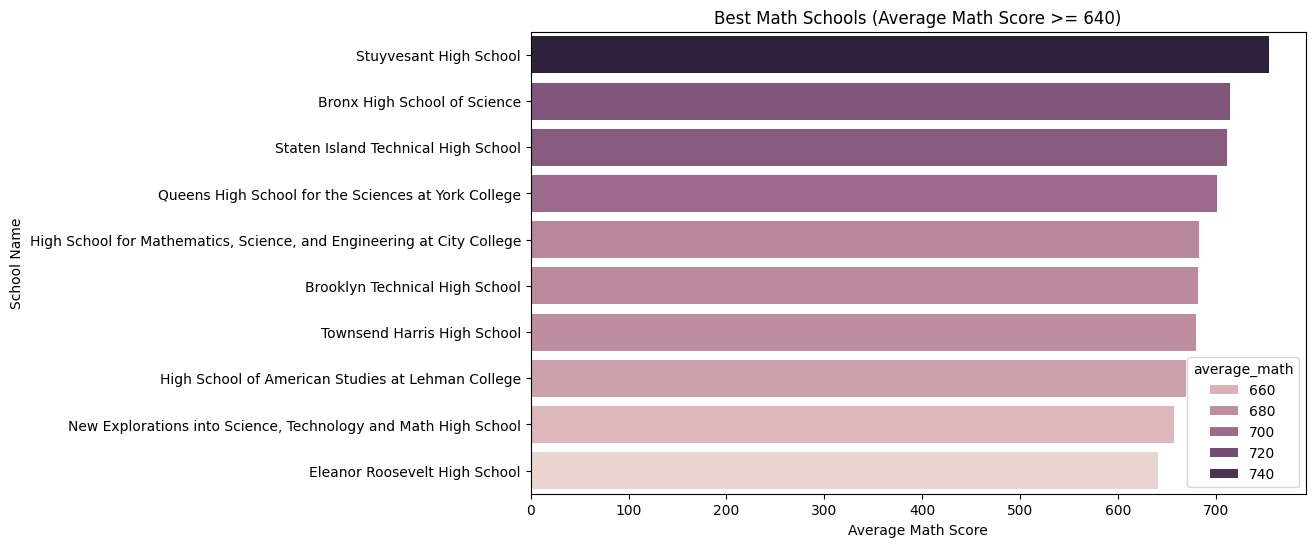

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_math', y='school_name', data=best_math_schools, hue='average_math')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Best Math Schools (Average Math Score >= 640)')
plt.show()

The top 10 schools based on combined SAT score

In [15]:
schools['total_SAT'] = (schools['average_math']) + (schools['average_reading']) + (schools['average_writing'])

top_10_schools = schools[['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False).head(10)

top_10_schools.head(10)

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


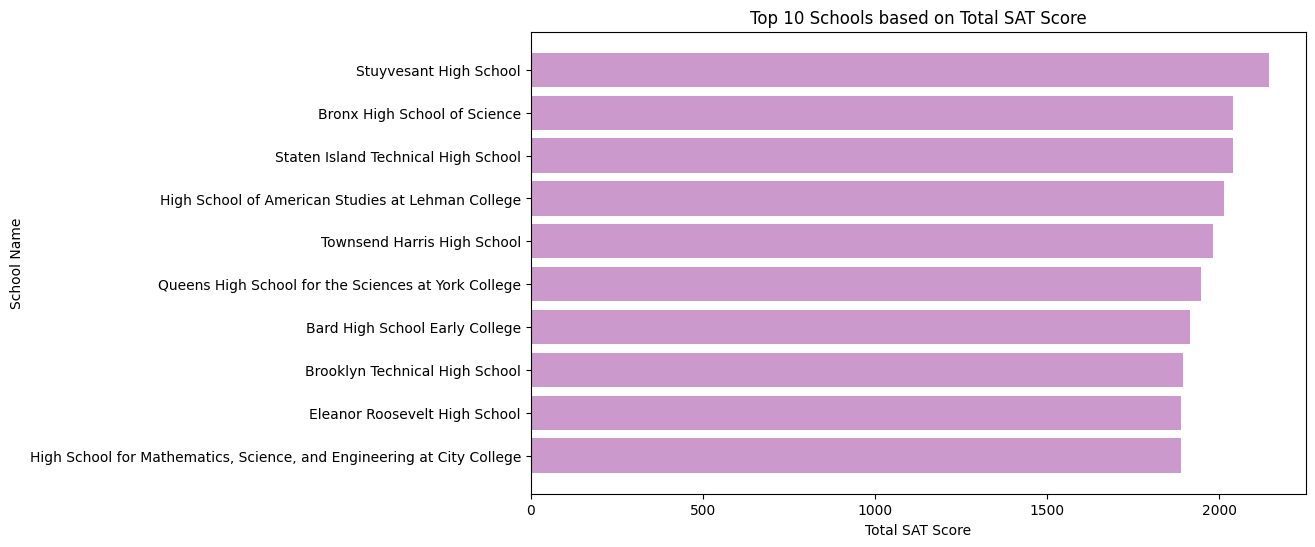

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color=(0.8, 0.6, 0.8))
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.title('Top 10 Schools based on Total SAT Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()

The borough with the largest standard deviation in the combined SAT score

In [19]:
# count the schools per borough, the mean of the total SAT per borough, and the standard deviation of the total SAT per borough
borough_stats = schools.groupby('borough')['total_SAT'].agg(['std', 'count', 'mean']).round(2)

# max std dev borough
largest_std_dev = borough_stats[borough_stats['std'] == borough_stats['std'].max()]

largest_std_dev = largest_std_dev.rename(columns={'count':'num_schools', 'mean':'average_SAT', 'std':'std_SAT'})

largest_std_dev.reset_index(inplace=True)
largest_std_dev.head()

,borough,std_SAT,num_schools,average_SAT
0,Manhattan,230.29,89,1340.13
